# Single stock Example

Here's a simple example where we produce a set of plots, called a tear sheet, for a single stock.

## Imports and Settings

In [1]:
# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pyfolio as pf
%matplotlib inline

## Download daily stock prices using yfinance

Pyfolio expects tz-aware input set to UTC timezone.

You may have to import `yfinance` first by running:
```bash
pip install yfinance
```

In [3]:
fb = yf.Ticker('FB')
history = fb.history('max')
history.index = history.index.tz_localize('utc')

In [4]:
history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2243 entries, 2012-05-18 00:00:00+00:00 to 2021-04-19 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2243 non-null   float64
 1   High          2243 non-null   float64
 2   Low           2243 non-null   float64
 3   Close         2243 non-null   float64
 4   Volume        2243 non-null   int64  
 5   Dividends     2243 non-null   int64  
 6   Stock Splits  2243 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 140.2 KB


In [5]:
returns = history.Close.pct_change()

## Create returns tear sheet
This will show charts and analysis about returns of the single stock.

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,53.62,2012-05-18,2012-09-04,2013-08-05,317
1,42.96,2018-07-25,2018-12-24,2020-01-09,382
2,34.59,2020-01-29,2020-03-16,2020-05-20,81
3,22.06,2014-03-10,2014-04-28,2014-07-24,99
4,21.17,2018-02-01,2018-03-27,2018-06-01,87


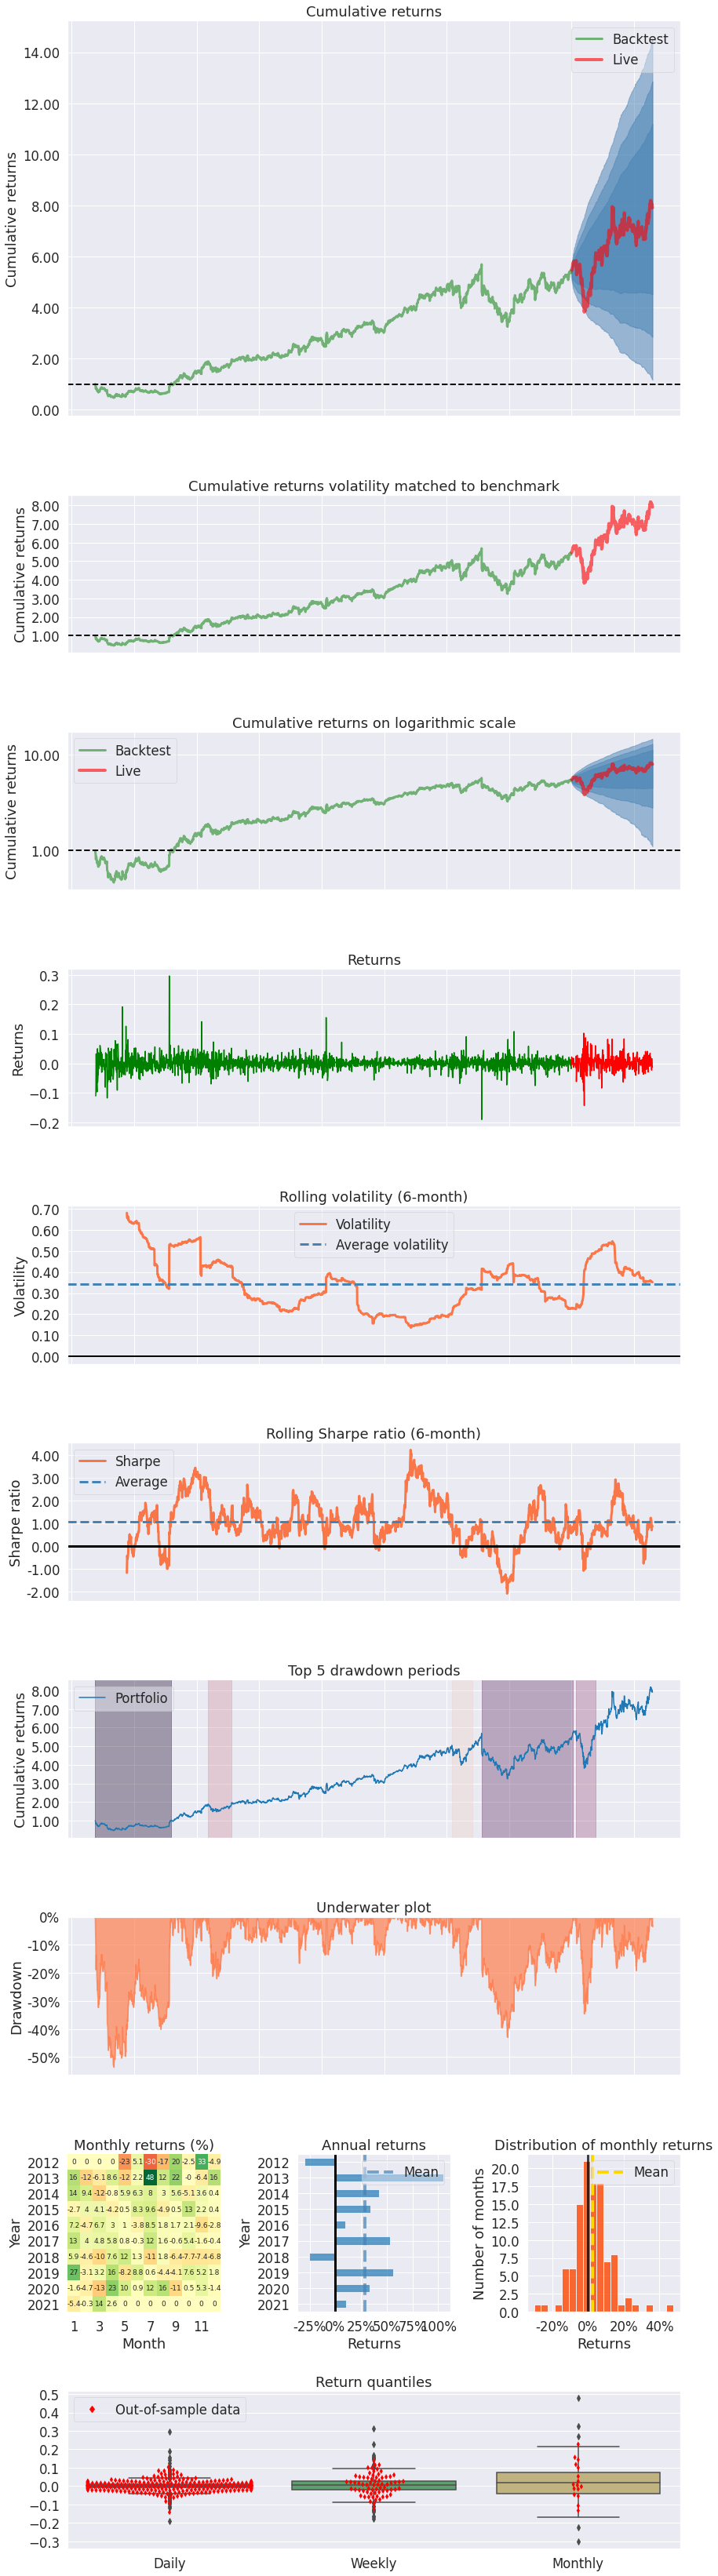

In [6]:
pf.create_returns_tear_sheet(returns, live_start_date='2020-1-1')